In [5]:
# Import library yang diperlukan

# Import library yang diperlukan

#Pandas untuk manipulasi dan analisis data, terutama dengan struktur DataFrame.
import pandas as pd

#NumPy untuk operasi matematis dan komputasi array n-dimensi.
import numpy as np

#LabelBinarizer dari sklearn.preprocessing untuk mengonversi label kategori
#    menjadi format biner (one-hot encoding).
from sklearn.preprocessing import LabelBinarizer

#KNeighborsClassifier dari sklearn.neighbors adalah algoritma K-Nearest Neighbors (KNN)
#    untuk klasifikasi berbasis jarak.
from sklearn.neighbors import KNeighborsClassifier

# Fungsi-fungsi evaluasi dari sklearn.metrics:
#    - accuracy_score: untuk menghitung akurasi prediksi.
#    - precision_score: untuk menghitung presisi model.
#    - recall_score: untuk menghitung sensitivitas (recall).
#    - f1_score: untuk menghitung rata-rata harmonik antara presisi dan recall.
#    - classification_report: untuk menampilkan ringkasan metrik evaluasi.
#    - matthews_corrcoef: untuk menghitung koefisien korelasi Matthews.
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, classification_report, matthews_corrcoef
)

# Fungsi `euclidean` dari scipy.spatial.distance untuk menghitung jarak Euclidean
#    antara dua titik dalam ruang n-dimensi.
from scipy.spatial.distance import euclidean

# Matplotlib untuk membuat visualisasi data (plotting).
import matplotlib.pyplot as plt

#Seaborn untuk membuat visualisasi data statistik yang lebih menarik.
import seaborn as sns

url = '/content/anemoia predic.csv'

# Membaca dataset
df  = pd.read_csv(url)

df

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.2555,30.8421,25.9025,6.3,Yes
1,2,F,45.6033,28.1900,26.2067,13.5,No
2,3,F,45.0107,28.9677,26.0215,11.7,No
3,4,F,44.5398,28.9899,26.4703,13.5,No
4,5,M,43.2870,30.6972,26.0158,12.4,No
...,...,...,...,...,...,...,...
99,100,F,49.9999,29.2860,20.7141,14.5,Yes
100,101,M,42.2324,30.6757,27.0919,6.3,Yes
101,102,F,45.6064,31.9084,22.4852,12.7,No
102,103,M,45.2095,29.2769,25.5136,13.4,No


In [7]:
# Menampilkan data NULL, NA, dan NAN
print("Data dengan nilai NULL, NA, atau NAN:")
print(df[df.isnull().any(axis=1)])

# Menampilkan data duplikasi
print("\nData duplikasi:")
print(df[df.duplicated()])

# Menghapus data NULL, NA, dan NAN
df = df.dropna()

# Menghapus data duplikasi
df = df.drop_duplicates()

# Menampilkan DataFrame setelah dibersihkan
print("\nDataFrame setelah dibersihkan:")
print(df)

Data dengan nilai NULL, NA, atau NAN:
Empty DataFrame
Columns: [Number, Sex, %Red Pixel, %Green pixel, %Blue pixel, Hb, Anaemic]
Index: []

Data duplikasi:
Empty DataFrame
Columns: [Number, Sex, %Red Pixel, %Green pixel, %Blue pixel, Hb, Anaemic]
Index: []

DataFrame setelah dibersihkan:
     Number Sex  %Red Pixel  %Green pixel  %Blue pixel    Hb Anaemic
0         1   M     43.2555       30.8421      25.9025   6.3     Yes
1         2   F     45.6033       28.1900      26.2067  13.5      No
2         3  F      45.0107       28.9677      26.0215  11.7      No
3         4   F     44.5398       28.9899      26.4703  13.5      No
4         5  M      43.2870       30.6972      26.0158  12.4      No
..      ...  ..         ...           ...          ...   ...     ...
99      100  F      49.9999       29.2860      20.7141  14.5     Yes
100     101  M      42.2324       30.6757      27.0919   6.3     Yes
101     102   F     45.6064       31.9084      22.4852  12.7      No
102     103  M      4

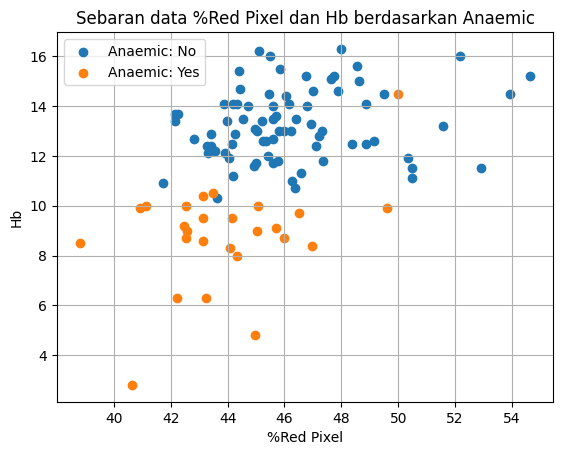

In [19]:
import matplotlib.pyplot as plt

# Membuat figure dan axes untuk plot menggunakan Matplotlib
fig, ax = plt.subplots()

# Melakukan iterasi berdasarkan grup pada DataFrame df yang dikelompokkan berdasarkan kolom 'Anaemic'
for Anaemic, d in df.groupby('Anaemic'):
# Membuat scatter plot untuk setiap grup
# x = data '%Red Pixel', y = data 'Hb'
    # 'label=Anaemic' memberikan label untuk setiap grup (diambil dari nilai kolom 'Anaemic')
    ax.scatter(d['%Red Pixel'], d['Hb'], label=f"Anaemic: {Anaemic}")
# Menambahkan legenda untuk membedakan grup berdasarkan 'Anaemic'
plt.legend(loc='upper left')
# Menambahkan judul pada plot
plt.title('Sebaran data %Red Pixel dan Hb berdasarkan Anaemic')
# Menambahkan label pada sumbu x ('%Red Pixel')
plt.xlabel('%Red Pixel')
# Menambahkan label pada sumbu y ('Hb')
plt.ylabel('Hb')
# Menambahkan grid untuk mempermudah pembacaan plot
plt.grid(True)
# Menampilkan plot ke layar
plt.show()

In [21]:
import numpy as np

# Mengonversi kolom '%Red Pixel' dan 'Hb' dari DataFrame df menjadi array NumPy 2D
# Data ini digunakan sebagai fitur (input) untuk model machine learning
x_train = np.array(df[['%Red Pixel', 'Hb']])

# Mengonversi kolom 'Anaemic' dari DataFrame df menjadi array NumPy 1D
# Data ini digunakan sebagai label (output) untuk model machine learning
y_train = np.array(df['Anaemic'])

# Mencetak isi x_train (fitur/input) dengan format array NumPy
print(f'x_train:\n{x_train}\n')
# Mencetak isi y_train (label/output) dengan format array NumPy
print(f'y_train: {y_train}')

x_train:
[[43.2555  6.3   ]
 [45.6033 13.5   ]
 [45.0107 11.7   ]
 [44.5398 13.5   ]
 [43.287  12.4   ]
 [45.0994 16.2   ]
 [43.1457  8.6   ]
 [43.6103 10.3   ]
 [45.0423 13.    ]
 [46.5143  9.7   ]
 [45.3506 12.6   ]
 [44.4062 15.4   ]
 [44.9642  4.8   ]
 [45.0484  9.    ]
 [46.9942 14.6   ]
 [45.5842 14.    ]
 [42.5358 10.    ]
 [44.0957  8.3   ]
 [45.7104 13.6   ]
 [40.9365  9.9   ]
 [44.9116 11.6   ]
 [43.4225 12.4   ]
 [43.3019 12.1   ]
 [47.6372 15.1   ]
 [45.6906  9.1   ]
 [43.4098 12.9   ]
 [44.4252 14.7   ]
 [44.3297 14.1   ]
 [47.8913 14.6   ]
 [42.2473 13.7   ]
 [44.2572 12.9   ]
 [48.6358 15.    ]
 [42.1652 13.4   ]
 [45.4434 14.5   ]
 [42.1528 13.7   ]
 [45.2588 12.6   ]
 [46.4081 13.5   ]
 [47.2275 12.8   ]
 [47.3642 11.8   ]
 [46.1449 14.1   ]
 [41.7122 10.9   ]
 [47.9777 16.3   ]
 [46.7628 15.2   ]
 [44.9526 13.1   ]
 [44.1868 14.1   ]
 [46.9428 13.3   ]
 [48.8523 14.1   ]
 [45.7581 11.8   ]
 [48.5356 15.6   ]
 [45.5833 11.7   ]
 [45.9659 13.    ]
 [44.0418 11.9   ]
 [4

In [22]:
from sklearn.preprocessing import LabelBinarizer

# Membuat objek LabelBinarizer, yang digunakan untuk mengonversi label kategori menjadi format biner
lb = LabelBinarizer()

# Menggunakan LabelBinarizer untuk mengonversi y_train (label asli) menjadi format biner
# fit_transform() secara otomatis melakukan dua hal:
# 1. Menyesuaikan LabelBinarizer dengan data (fit)
# 2. Mengonversi data sesuai dengan skema biner (transform)
y_train = lb.fit_transform(y_train)

# Mencetak hasil y_train setelah dikonversi ke format biner
print(f'y_train:\n{y_train}')

y_train:
[[1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]]


In [23]:
# Mengubah array 2D y_train menjadi array 1D menggunakan fungsi flatten()
# Setelah LabelBinarizer, y_train berbentuk array 2D dengan setiap label dalam format biner,
# seperti [[0], [1], [1], ...]. flatten() mengubahnya menjadi [0, 1, 1, ...].
y_train = y_train.flatten()

# Mencetak hasil y_train setelah diubah menjadi array 1D
print(f'y_train: {y_train}')

y_train: [1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0
 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0]


In [24]:
from sklearn.neighbors import KNeighborsClassifier

# Menentukan jumlah nearest neighbors/tetangga terdekat (K) yang digunakan dalam algoritma K-Nearest Neighbors (KNN)
K = 3

# Membuat objek model KNeighborsClassifier dengan parameter n_neighbors=K
# n_neighbors menentukan jumlah tetangga yang akan dipertimbangkan dalam proses klasifikasi
model = KNeighborsClassifier(n_neighbors=K)

# Melatih model KNN menggunakan data latih (x_train) dan label latih (y_train)
# model.fit() akan menemukan pola dalam data latih untuk kemudian digunakan dalam prediksi
model.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [25]:
# Prediksi klasifikasi anemia kronis

# Menetapkan nilai %Red Pixel dan Hb untuk data baru
A_red_pixel = 45.5
A_hb = 12.7

# Membuat array NumPy dengan data baru [A_red_pixel, A_hb] dan mengubahnya menjadi array 2D dengan reshape
# reshape(1, -1) mengubah array 1D menjadi array 2D dengan 1 baris dan sejumlah kolom sesuai panjang array
x_new = np.array([[A_red_pixel, A_hb]]).reshape(1, -1)

# Menampilkan x_new untuk memverifikasi format data baru (array 2D dengan 1 baris)
x_new

array([[45.5, 12.7]])

In [26]:
# Prediksi klasifikasi anemia kronis berdasarkan data baru

# Menggunakan model yang telah dilatih (model) untuk memprediksi label dari data baru (x_new)
# model.predict(x_new) akan mengembalikan hasil prediksi berdasarkan input data baru
y_new = model.predict(x_new)

# Menampilkan hasil prediksi y_new yang berisi label (outcome) untuk data baru
y_new


array([0])

In [27]:
# Prediksi klasifikasi anemia kronis berdasarkan data baru

# Menggunakan model yang telah dilatih (model) untuk memprediksi label dari data baru (x_new)
# model.predict(x_new) akan mengembalikan hasil prediksi berdasarkan input data baru
y_new = model.predict(x_new)

# Menggunakan inverse_transform() dari LabelBinarizer untuk mengonversi hasil prediksi (y_new)
# dari format biner kembali ke label asli
y_new_original = lb.inverse_transform(y_new)

# Menampilkan hasil prediksi dalam format label asli
y_new_original


array(['No'], dtype='<U3')

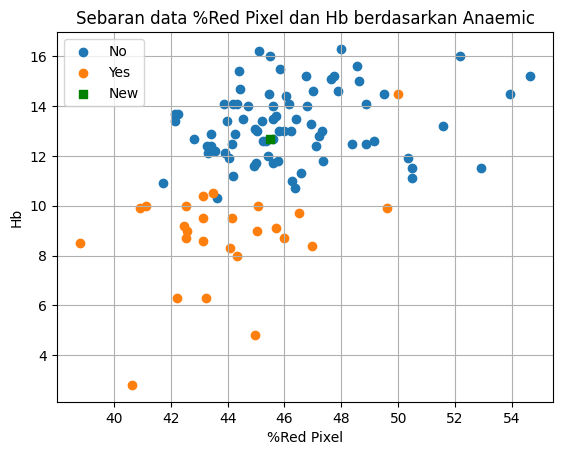

In [32]:
# Membuat figure dan axes untuk plot menggunakan Matplotlib
fig, ax = plt.subplots()

# Melakukan iterasi berdasarkan grup pada DataFrame df yang dikelompokkan berdasarkan kolom 'Anaemic'
for Anaemic, d in df.groupby('Anaemic'):
    # Membuat scatter plot untuk setiap grup
    # x = data '%Red Pixel', y = data 'Hb'
    # Diubah menjadi kolom yang ada dalam DataFrame, misal 'Hb' dan '%Red Pixel'
    ax.scatter(d['%Red Pixel'], d['Hb'], label=Anaemic)

ax.scatter(A_red_pixel,
           A_hb,
           marker='s',  # Menandakan titik data baru menggunakan bentuk persegi
           color='green', # Menentukan warna titik data baru menjadi hijau
           label='New')  # Label untuk titik data baru

# Menambahkan legenda, judul, dan label sumbu
plt.legend(loc='upper left')
plt.title('Sebaran data %Red Pixel dan Hb berdasarkan Anaemic')
plt.xlabel('%Red Pixel')
plt.ylabel('Hb')
plt.grid(True)
plt.show()

In [33]:
x_train

array([[43.2555,  6.3   ],
       [45.6033, 13.5   ],
       [45.0107, 11.7   ],
       [44.5398, 13.5   ],
       [43.287 , 12.4   ],
       [45.0994, 16.2   ],
       [43.1457,  8.6   ],
       [43.6103, 10.3   ],
       [45.0423, 13.    ],
       [46.5143,  9.7   ],
       [45.3506, 12.6   ],
       [44.4062, 15.4   ],
       [44.9642,  4.8   ],
       [45.0484,  9.    ],
       [46.9942, 14.6   ],
       [45.5842, 14.    ],
       [42.5358, 10.    ],
       [44.0957,  8.3   ],
       [45.7104, 13.6   ],
       [40.9365,  9.9   ],
       [44.9116, 11.6   ],
       [43.4225, 12.4   ],
       [43.3019, 12.1   ],
       [47.6372, 15.1   ],
       [45.6906,  9.1   ],
       [43.4098, 12.9   ],
       [44.4252, 14.7   ],
       [44.3297, 14.1   ],
       [47.8913, 14.6   ],
       [42.2473, 13.7   ],
       [44.2572, 12.9   ],
       [48.6358, 15.    ],
       [42.1652, 13.4   ],
       [45.4434, 14.5   ],
       [42.1528, 13.7   ],
       [45.2588, 12.6   ],
       [46.4081, 13.5   ],
 

In [37]:
# Define 'misterius' with the data point you want to compare against
misterius = np.array([A_red_pixel, A_hb])  # Assuming A_red_pixel and A_hb are defined earlier

# Menghitung jarak Euclidean antara data misterius dan setiap data dalam x_train
# Jarak Euclidean dihitung untuk setiap elemen (d) dalam x_train menggunakan list comprehension
data_jarak = [euclidean(misterius, d) for d in x_train]

# Menampilkan list 'data_jarak' yang berisi jarak Euclidean antara data baru (New) dan setiap data latih
print(data_jarak)

[6.782166339009978, 0.8066417358406398, 1.1132899397731033, 1.2497935989594449, 2.233241814045224, 3.5228511691526223, 4.72786722423547, 3.0546630076000176, 0.5472561466077863, 3.1668287749734745, 0.1797786416680244, 2.913142365213209, 7.918148877105052, 3.7274579219623654, 2.4171540372926175, 1.302723930846441, 4.009548807534332, 4.618664145616131, 0.9242662819772236, 5.354020195143082, 1.2474832904692548, 2.0990488917602663, 2.2785178537812656, 3.2136620606404778, 3.605042074650447, 2.0997466609093616, 2.2705054591434055, 1.824719729163905, 3.05422914824674, 3.402948323145678, 1.25878983154457, 3.888861226631779, 3.4074757578007815, 1.8008896579191083, 3.49338629985291, 0.26110810021904635, 1.2102254376767978, 1.7303919353718675, 2.0700825200943043, 1.5413941773602238, 4.193736858697738, 4.370239957942814, 2.800832704750499, 0.6779725363169247, 1.9195036441747138, 1.562584986488734, 3.6328935148170802, 0.9362775283002347, 4.198198108712834, 1.003463447266516, 0.554132484158796, 1.663

In [42]:
# Menambahkan kolom baru ke DataFrame 'df' dengan nama 'jarak' yang berisi data jarak Euclidean
# 'data_jarak' adalah list yang berisi jarak Euclidean antara data misterius dan setiap data dalam x_train.
df['jarak'] = data_jarak

# Mengurutkan DataFrame 'df' berdasarkan kolom 'jarak' secara ascending (default)
# Ini akan mengurutkan data berdasarkan jarak terdekat ke data baru (New).
df_sorted = df.sort_values(['jarak'])

# Menampilkan DataFrame yang sudah diurutkan
df_sorted


,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic,jarak
101,102,F,45.6064,31.9084,22.4852,12.7,No,0.106400
10,11,F,45.3506,29.1248,25.5246,12.6,No,0.179779
35,36,M,45.2588,28.0079,26.7333,12.6,No,0.261108
57,58,M,45.7986,27.7309,26.4706,13.0,No,0.423275
8,9,F,45.0423,29.1660,25.7918,13.0,No,0.547256
...,...,...,...,...,...,...,...,...
64,65,F,38.7968,31.3618,29.8414,8.5,Yes,7.910303
12,13,F,44.9642,30.5279,24.5079,4.8,Yes,7.918149
75,76,M,53.9113,26.3455,19.7433,14.5,No,8.601742
88,89,M,54.6478,25.8109,19.5413,15.2,No,9.483261


In [43]:
# Membuat array NumPy untuk data uji (x_test), yang berisi fitur yang akan diuji oleh model
# Setiap baris dalam 'x_test' berisi dua nilai: tekanandarah dan albumin untuk masing-masing data uji
X_test = np.array([[110, 3], [100, 4], [70, 3], [60, 1]])

# Membuat array NumPy untuk label target uji (y_test), yang berisi hasil untuk masing-masing data uji
# Label target adalah 'yes' atau 'no', yang diubah menjadi format biner menggunakan LabelBinarizer
# Fungsi 'transform()' mengonversi label asli ('yes' dan 'no') menjadi angka biner (1 untuk 'yes', 0 untuk 'no')
y_test = lb.transform(np.array(['no', 'yes', 'no', 'yes'])).flatten()

# Menampilkan nilai 'x_test' yang berisi fitur dari data uji (%Red Pixel dan Hb)
print(f'X_test:\n{X_test}\n')

# Menampilkan nilai 'y_test' yang berisi label target dalam format biner (0 atau 1)
print(f'y_test:\n{y_test}')

X_test:
[[110   3]
 [100   4]
 [ 70   3]
 [ 60   1]]

y_test:
[0 0 0 0]


In [44]:
# Prediksi terhadap testing set

# Menggunakan model yang telah dilatih untuk membuat prediksi berdasarkan data uji (x_test)
# 'model.predict()' akan memprediksi label target (misalnya, 'yes' atau 'no') untuk setiap data di 'x_test'
y_pred = model.predict(X_test)

# Menampilkan hasil prediksi yang disimpan dalam variabel 'y_pred'
# 'y_pred' berisi array dengan prediksi model untuk setiap data uji dalam 'x_test'
print(f'y_pred:\n{y_pred}')


y_pred:
[0 0 0 0]


In [45]:
# Menghitung akurasi model dengan membandingkan label yang diprediksi ('y_pred') dengan label yang sebenarnya ('y_test')
# Fungsi 'accuracy_score()' dari sklearn.metrics akan menghitung persentase prediksi yang benar dari total prediksi
acc = accuracy_score(y_test, y_pred)

# Menampilkan nilai akurasi yang dihitung
# 'acc' berisi nilai akurasi yang menunjukkan seberapa tepat model dalam memprediksi label yang benar
print(f'Accuracy: {acc}')


Accuracy: 1.0


In [46]:
# Menghitung presisi model dengan membandingkan label yang diprediksi ('y_pred') dengan label yang sebenarnya ('y_test')
# Fungsi 'precision_score()' dari sklearn.metrics digunakan untuk menghitung presisi
# Presisi adalah rasio antara prediksi positif yang benar (True Positives) dengan seluruh prediksi positif (True Positives + False Positives)
prec = precision_score(y_test, y_pred)

# Menampilkan nilai presisi yang dihitung
# 'prec' berisi nilai presisi yang menunjukkan seberapa akurat model dalam mengklasifikasikan kelas positif (misalnya 'yes')
print(f'Precision: {prec}')

Precision: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [47]:
# Menghitung recall (sensitivitas) model dengan membandingkan label yang diprediksi ('y_pred') dengan label yang sebenarnya ('y_test')
# Fungsi 'recall_score()' dari sklearn.metrics digunakan untuk menghitung recall
# Recall adalah rasio antara prediksi positif yang benar (True Positives) dengan seluruh data yang sebenarnya positif (True Positives + False Negatives)
rec = recall_score(y_test, y_pred)

# Menampilkan nilai recall yang dihitung
# 'rec' berisi nilai recall yang menunjukkan seberapa baik model dalam mendeteksi semua kasus positif
print(f'Recall: {rec}')


Recall: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [48]:
# Menghitung F1 score model dengan membandingkan label yang diprediksi ('y_pred') dengan label yang sebenarnya ('y_test')
# Fungsi 'f1_score()' dari sklearn.metrics digunakan untuk menghitung F1 score
# F1 score adalah rata-rata harmonis antara presisi dan recall, yang memberikan keseimbangan antara keduanya
# Formula F1 score adalah: F1 = 2 * (Precision * Recall) / (Precision + Recall)
f1 = f1_score(y_test, y_pred)

# Menampilkan nilai F1 score yang dihitung
# 'f1' berisi nilai F1 score yang menunjukkan keseimbangan antara presisi dan recall untuk model
print(f'F1-Score: {f1}')


F1-Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [50]:
# Menghitung laporan klasifikasi untuk menilai kinerja model dalam hal presisi, recall, f1 score, dan akurasi
# Fungsi 'classification_report()' dari sklearn.metrics menghasilkan laporan evaluasi yang lebih lengkap
# Laporan ini mencakup metrik-metrik seperti presisi, recall, F1 score, dan support untuk setiap kelas (misalnya, 'yes' dan 'no')
cls_report = classification_report(y_test, y_pred)

# Menampilkan laporan klasifikasi yang dihitung
# 'cls_report' berisi ringkasan metrik evaluasi model yang memberikan informasi detail tentang kinerja model per kelas
print(f'Classification Report: \n{cls_report}')

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



In [51]:
# Menghitung Matthews Correlation Coefficient (MCC) untuk menilai kinerja model secara keseluruhan
# Fungsi 'matthews_corrcoef()' dari sklearn.metrics digunakan untuk menghitung MCC
# MCC adalah metrik yang mengukur kualitas prediksi dalam masalah klasifikasi biner
# Nilai MCC berkisar antara -1 (prediksi sepenuhnya salah) hingga +1 (prediksi sepenuhnya benar),
# dan nilai 0 menunjukkan prediksi acak atau model yang tidak lebih baik dari tebakan acak
mcc = matthews_corrcoef(y_test, y_pred)

# Menampilkan nilai MCC yang dihitung
# 'mcc' berisi nilai Matthews Correlation Coefficient yang menunjukkan seberapa baik model dalam memprediksi kelas positif dan negatif
print(f'MCC: {mcc}')

MCC: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
